# Trajectory of Taxis

Here we'll explore taxi trip data collected from Shenzhen in 2009. 

It's described in Cheng et al. 2019.
 
Cheng, B., Qian, S., Cao, J., Xue, G., Yu, J., Zhu, Y., ... & Zhang, T. (2019, April). STL: Online Detection of Taxi Trajectory Anomaly Based on Spatial-Temporal Laws. In International Conference on Database Systems for Advanced Applications (pp. 764-779). Springer, Cham.

https://link.springer.com/chapter/10.1007/978-3-030-18579-4_45




### Set up and import libraries

In [9]:
from __future__ import division 
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.style.use('ggplot')
import os
import glob
import datashader as ds
import datashader.transfer_functions as tf

import folium


Read files into a dataframe
This takes several seconds.
Here we use one file as example.

In [10]:
import requests
import shutil
import os
import zipfile

#req = requests.get('https://github.com/cybergis/cybergis-jupyter-notebook-repo/blob/master/geospatial/taxi.zip', stream=True)
#with open('taxi.zip', 'wb') as file:
#    shutil.copyfileobj(req.raw, file)
    
if not os.path.exists('./data'):
    os.mkdir('./data')
    
with zipfile.ZipFile('taxi.zip', 'r') as file:
    file.extractall('./data')

os.listdir('./data/taxi')

['.DS_Store', 'TRK20090923.txt']

In [11]:
path = r'./data/'
#taxi_files = glob.glob(os.path.join(path, "*.txt")) 


filename = './data/taxi/TRK20090923.txt'
column_names = ['taxi_id', 'date_time', 'longitude', 'latitude', 'speed', 'direction', 'occupied','other']
#df_master = pd.concat(pd.read_csv(f, names=column_names) for f in taxi_files)  #glue all data into the dataframe
df_master = pd.read_csv(filename, names=column_names)
df_master['date_time'] = pd.to_datetime(df_master.date_time) # Correct the type in date_time column

### Example of taxi trajectory Data and the amount of data

In [12]:
print(len(df_master))
df_master.head(15)

1007097


,taxi_id,date_time,longitude,latitude,speed,direction,occupied,other
0,B001B1,2009-09-23 21:32:56,114.06070,22.52170,28,0,0,0
1,B001B1,2009-09-23 21:33:51,114.06070,22.52170,0,0,0,0
2,B001B1,2009-09-23 21:34:46,114.06068,22.52165,0,0,0,0
3,B001B1,2009-09-23 21:35:41,114.06084,22.52182,5,0,0,0
4,B001B1,2009-09-23 21:36:36,114.06060,22.52258,4,0,0,0
5,B001B1,2009-09-23 21:37:31,114.05995,22.52545,17,0,0,0
6,B001B1,2009-09-23 21:38:26,114.06075,22.52567,4,0,0,0
7,B001B1,2009-09-23 21:38:50,114.06075,22.52567,0,0,1,31
8,B001B1,2009-09-23 21:39:45,114.06316,22.52787,26,0,1,31
9,B001B1,2009-09-23 21:40:40,114.06580,22.53153,40,0,1,31


In [13]:
df = df_master.copy() # Allows you to 'restart' the worksheet without waiting to recreate dataframe

In [14]:
# Use numpy functions for the distance formula

def gps_dist(a, b, c, d):    
    '''Compute the distance (in meters) between two gps locations. Input is assumed to be a = longitude, b = latitude, etc.'''
    r = 0.0174533  # 1 degree in radians
    return 2 * 6371000 * np.arcsin( np.sqrt( # https://en.wikipedia.org/wiki/Haversine_formula
        np.sin(r*(d - b)/2.0)**2 + np.cos(r*b) * np.cos(r*d) * np.sin(r*(c - a)/2.0)**2))

### Visualization of the whole taxi trajectory dataset

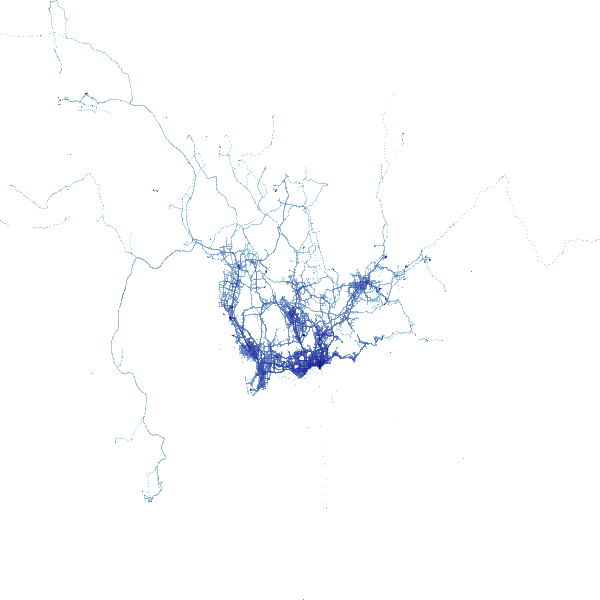

In [15]:
#Visualize the dataset
#Finally, let's just take a look at the raw dataset. 
maindt = df[df.occupied== 1]
maindt = df[abs(df.longitude -114.05) <= 1]
maindt = maindt[abs(maindt.latitude - 22.5) <= 1]
cvs = ds.Canvas(plot_width=600, plot_height=600)
agg = cvs.points(maindt,'longitude','latitude')
img = tf.shade(agg, cmap=['lightblue','darkblue'],how='log')
img

### Visualization of the whole taxi trajectory dataset in Shenzhen

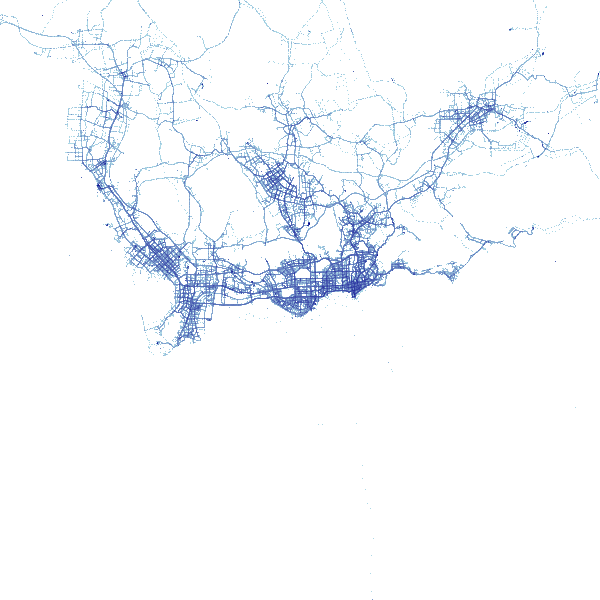

In [16]:
#Now zooming in on Shenzhen.

maindt = df[abs(df.longitude -114.05) <= 0.35]
maindt = maindt[abs(maindt.latitude - 22.5) <= 0.35]
cvs = ds.Canvas(plot_width=600, plot_height=600)
agg = cvs.points(maindt,'longitude','latitude')
img = tf.shade(agg, cmap=['lightblue','darkblue'],how='log')
img
